In [17]:
# import libraries
import geopandas as gpd
import numpy as np

In [2]:
# load the data
full_data = gpd.read_file("../input/geospatial-learn-course-data/DEC_lands/DEC_lands/DEC_lands.shp")

# view the first five rows of the data
full_data.head()

,OBJECTID,CATEGORY,UNIT,FACILITY,CLASS,UMP,DESCRIPTIO,REGION,COUNTY,URL,SOURCE,UPDATE_,OFFICE,ACRES,LANDS_UID,GREENCERT,SHAPE_AREA,SHAPE_LEN,geometry
0,1,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,NaN,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,738.620192,103,N,2.990365e+06,7927.662385,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,2,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,NaN,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,282.553140,1218,N,1.143940e+06,4776.375600,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,3,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,NaN,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,234.291262,1780,N,9.485476e+05,5783.070364,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
3,4,FOR PRES DET PAR,CFP,GREENE COUNTY FP DETACHED PARCEL,WILD FOREST,NaN,NaN,4,GREENE,http://www.dec.ny.gov/,GREENE RPP,5/12,STAMFORD,450.106464,2060,N,1.822293e+06,7021.644833,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
4,6,FOREST PRESERVE,AFP,SARANAC LAKES WILD FOREST,WILD FOREST,SARANAC LAKES,NaN,5,ESSEX,http://www.dec.ny.gov/lands/22593.html,"DECRP, ESSEX RPP",12/96,RAY BROOK,69.702387,1517,N,2.821959e+05,2663.909932,"POLYGON ((583896.043 4909643.187, 583891.200 4..."


In [13]:
# missing values in the dataset
missing_values = full_data.isnull().sum()
missing_values

OBJECTID         0
CATEGORY         0
UNIT           510
FACILITY         7
CLASS         1764
UMP            636
DESCRIPTIO    2503
REGION           0
COUNTY           0
URL              0
SOURCE           0
UPDATE_         34
OFFICE         172
ACRES            0
LANDS_UID        0
GREENCERT        1
SHAPE_AREA       0
SHAPE_LEN        0
geometry         0
dtype: int64

In [16]:
missing_values[missing_values > 0]

UNIT           510
FACILITY         7
CLASS         1764
UMP            636
DESCRIPTIO    2503
UPDATE_         34
OFFICE         172
GREENCERT        1
dtype: int64

In [19]:
full_data.shape

(2983, 19)

In [20]:
# total values in the dataset
total_values = np.product(full_data.shape)
total_values

56677

In [21]:
# total missing values
total_missing = missing_values.sum()
total_missing

5627

In [22]:
#total percent of the missing values
percent = (total_missing/total_values) * 100
percent

9.928189565432186

In [3]:
type(full_data)

geopandas.geodataframe.GeoDataFrame

In [9]:
data = full_data.loc[:,['CLASS','COUNTY','geometry']].copy()
data.head()

,CLASS,COUNTY,geometry
0,WILD FOREST,DELAWARE,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,WILD FOREST,DELAWARE,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,WILD FOREST,DELAWARE,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
3,WILD FOREST,GREENE,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
4,WILD FOREST,ESSEX,"POLYGON ((583896.043 4909643.187, 583891.200 4..."


In [38]:
# How many lands of each type are there
data.CLASS.value_counts()

CLASS
WILD FOREST                   965
INTENSIVE USE                 108
PRIMITIVE                      60
WILDERNESS                     52
ADMINISTRATIVE                 17
UNCLASSIFIED                    7
HISTORIC                        5
PRIMITIVE BICYCLE CORRIDOR      4
CANOE AREA                      1
Name: count, dtype: int64

In [7]:
data.COUNTY.value_counts()

COUNTY
HAMILTON        240
SUFFOLK         239
ST. LAWRENCE    214
ESSEX           208
FRANKLIN        166
WARREN          114
LEWIS           113
CLINTON         108
ULSTER          101
ONEIDA           96
OSWEGO           87
HERKIMER         82
FULTON           66
DELAWARE         66
SARATOGA         65
GREENE           60
CHENANGO         56
JEFFERSON        52
CATTARAUGUS      48
ALBANY           47
SULLIVAN         47
ALLEGANY         42
MADISON          40
WASHINGTON       40
CHAUTAUQUA       39
STEUBEN          36
SCHOHARIE        33
OTSEGO           32
CORTLAND         32
COLUMBIA         29
PUTNAM           28
WAYNE            28
ORANGE           27
DUTCHESS         25
ONONDAGA         25
RICHMOND         23
MONROE           18
TOMPKINS         18
BROOME           18
CAYUGA           18
SCHUYLER         17
LIVINGSTON       15
RENSSELAER       14
ONTARIO          13
TIOGA            12
ERIE             12
WYOMING          11
YATES            10
NASSAU            9
SENECA       

In [26]:
# select lands that fall under the "Wild Forest" or " Wildrness" category
wild_lands = data.loc[data.CLASS.isin(['WILD FOREST','WILDERNESS'])].copy()
wild_lands.head()

,CLASS,COUNTY,geometry
0,WILD FOREST,DELAWARE,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,WILD FOREST,DELAWARE,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,WILD FOREST,DELAWARE,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
3,WILD FOREST,GREENE,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
4,WILD FOREST,ESSEX,"POLYGON ((583896.043 4909643.187, 583891.200 4..."


<Axes: >

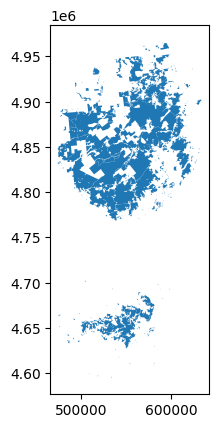

In [27]:
wild_lands.plot()

In [28]:
# view the first five entries in the 'geometry' column
wild_lands.geometry.head()

0    POLYGON ((486093.245 4635308.586, 486787.235 4...
1    POLYGON ((491931.514 4637416.256, 491305.424 4...
2    POLYGON ((486000.287 4635834.453, 485007.550 4...
3    POLYGON ((541716.775 4675243.268, 541217.579 4...
4    POLYGON ((583896.043 4909643.187, 583891.200 4...
Name: geometry, dtype: geometry

In [30]:
# Campsites in New York state (Point)
POI_data = gpd.read_file("../input/geospatial-learn-course-data/DEC_pointsinterest/DEC_pointsinterest/Decptsofinterest.shp")
campsites = POI_data.loc[POI_data.ASSET == 'PRIMITIVE CAMPSITE'].copy()

# Foot trails in New York state (LineString)
roads_trails = gpd.read_file("../input/geospatial-learn-course-data/DEC_roadstrails/DEC_roadstrails/Decroadstrails.shp")
trails = roads_trails.loc[roads_trails.ASSET=='FOOT TRAIL'].copy()

# County boundaries in New York state (Polygon)
counties = gpd.read_file("../input/geospatial-learn-course-data/NY_county_boundaries/NY_county_boundaries/NY_county_boundaries.shp")

In [32]:
POI_data.head()

,OBJECTID,UNIT,FACILITY,NAME,ASSET,DESCRIP,REGION,OFFICE,UPDATED,ASSET_UID,ACCESSIBLE,geometry
0,91706,CFP,DELAWARE WILD FOREST,ADA PRIMITIVE CAMPSITE,PRIMITIVE CAMPSITE,NaN,4,STAMFORD,2016-09-26,16519,N,POINT (505138.696 4649388.247)
1,108646,SCHUYLER 02,SUGAR HILL STATE FOREST,MAPLE LANE CAMPSITE #3,PRIMITIVE CAMPSITE,NaN,8,BATH,2018-02-23,18124,N,POINT (333481.874 4692737.800)
2,19933,AFP,MOOSE RIVER PLAINS WILD FOREST,MOOSE RIVER PLAINS CAMPSITE 103,PRIMITIVE CAMPSITE,LIVE,5,NORTHVILLE,2010-06-16,1018,N,POINT (525210.784 4833837.295)
3,3945,ALLEGANY 12,LOST NATION STATE FOREST,NEWLAND FR PARKING,UNPAVED PARKING LOT,-99,9,WEST ALMOND,NaN,8623,N,POINT (231909.125 4712818.500)
4,1037,CATTARAUGUS 08,ROCK CITY STATE FOREST,LRC PICNIC PAVILION #1,PICNIC PAVILION,NaN,9,ALLEGANY,NaN,14561,N,POINT (193656.734 4679632.500)


<Axes: >

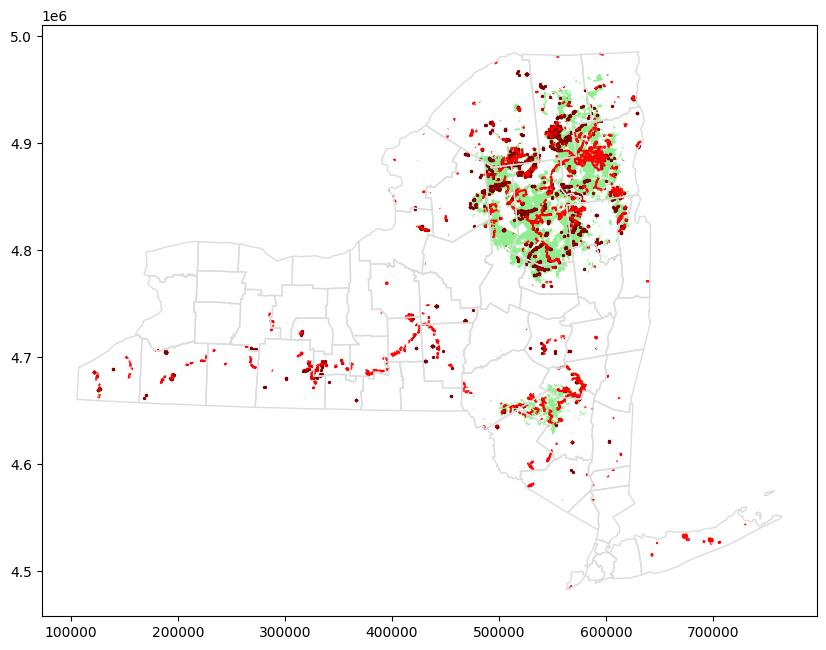

In [44]:
# Define a base map with county boundries
ax = counties.plot(figsize = (10,10), color = 'none', edgecolor = 'gainsboro', zorder = 3)

# Add wild lands, campsites, and foot trails to the base maps
wild_lands.plot(color = 'lightgreen', ax=ax)
campsites.plot(color = 'maroon', markersize = 2, ax=ax)
trails.plot(color = 'red', markersize = 1, ax=ax)
